Loading Data

In [23]:
import pandas as pd
data = pd.read_csv("nutrition.csv")

# Feature Extraction
data[['Latitude', 'Longitude']] = data['GeoLocation'].str.extract(r'\(([^,]+),\s*([^)]+)\)')
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')
data[['StratificationCategory', 'StratificationValue']] = data[['StratificationCategory1', 'Stratification1']]
data[['Income_Lower', 'Income_Upper']] = data['Income'].str.extract(r'\$(\d{1,3}(?:,\d{3})*)\s*-\s*\$(\d{1,3}(?:,\d{3})*)')
data['Income_Lower'] = data['Income_Lower'].str.replace(',', '').astype(float, errors='ignore')
data['Income_Upper'] = data['Income_Upper'].str.replace(',', '').astype(float, errors='ignore')

Data Characteristics

In [24]:

print("The shape os the dataset is : \n",data.shape)
print("Datatype of each attribute: \n",data.dtypes)
print("Sample attributes of dataset: \n",data.sample(7))

The shape os the dataset is : 
 (104272, 39)
Datatype of each attribute: 
 YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Data_Value_Unit               float64
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Sample_Size                   float64
Total                          object
Age(years)                     object
Education                      object
Gender                         object
Income                         object
Race/Ethnicity                 object
GeoLocation                    object
ClassID      

Data Collection and Manipulation

In [25]:
#Missing Values
def missing_values():
    missing_values = data.isnull().sum()
    print("missing values of each attribute : \n",missing_values)
    missing_percentage = data.isnull().mean() * 100
    print(missing_percentage)
missing_values()

missing values of each attribute : 
 YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
Datasource                         0
Class                              0
Topic                              0
Question                           0
Data_Value_Unit                15400
Data_Value_Type                    0
Data_Value                     10767
Data_Value_Alt                 10767
Data_Value_Footnote_Symbol     93505
Data_Value_Footnote            93505
Low_Confidence_Limit           10767
High_Confidence_Limit          10767
Sample_Size                    10767
Total                         100548
Age(years)                     81928
Education                      89376
Gender                         96824
Income                         78204
Race/Ethnicity                 74480
GeoLocation                     1932
ClassID                            0
TopicID                            0
Q

In [26]:
#Dupliate Rows
def duplicate():
    duplicates = data.duplicated().sum()
    print("Duplicates attributes in dataset are ",duplicates)

duplicate()

Duplicates attributes in dataset are  0


In [27]:

print(data["Total"].unique())
print(data["Data_Value_Footnote_Symbol"].unique())
print(data["Data_Value_Footnote"].unique())
print(data["Gender"].unique())
print(len(data["Data_Value"].unique()))
print(len(data["Data_Value_Alt"].unique()))
#Dropping Attributes
columns_to_drop = ["Total", "Data_Value_Footnote_Symbol", "Data_Value_Footnote","Gender","Data_Value_Alt","Income_Lower","Income_Upper"]
data = data.drop(columns=columns_to_drop)

[nan 'Total']
[nan '~']
[nan 'Data not available because sample size is insufficient.']
[nan 'Female' 'Male']
724
724


In [28]:
def missing_summary():
    missing_summary = pd.DataFrame({
        "Data Type": data.dtypes,
        "Missing Values Count": data.isnull().sum(),
        "Missing Values Percentage": data.isnull().mean() * 100
        })  
    print(missing_summary)
missing_summary()


                          Data Type  Missing Values Count  \
YearStart                     int64                     0   
YearEnd                       int64                     0   
LocationAbbr                 object                     0   
LocationDesc                 object                     0   
Datasource                   object                     0   
Class                        object                     0   
Topic                        object                     0   
Question                     object                     0   
Data_Value_Unit             float64                 15400   
Data_Value_Type              object                     0   
Data_Value                  float64                 10767   
Low_Confidence_Limit        float64                 10767   
High_Confidence_Limit       float64                 10767   
Sample_Size                 float64                 10767   
Age(years)                   object                 81928   
Education               

In [29]:
#Handling missing values of categorical attributres 
data["Income"] = data["Income"].fillna("Missing Income")
data["Education"] = data["Education"].fillna("Missing Education")
data["Race/Ethnicity"] = data["Race/Ethnicity"].fillna("Other")
data["Age(years)"] = data["Age(years)"].fillna("Missing age group")
data=data.dropna(subset=["GeoLocation"])
#Handling missing values of numerical attributes
from sklearn.impute import SimpleImputer
numerical_columns = data.select_dtypes(include=["float64","int64"]).columns
imputer = SimpleImputer(strategy="median")
data[numerical_columns]=imputer.fit_transform(data[numerical_columns])
missing_summary()


                          Data Type  Missing Values Count  \
YearStart                   float64                     0   
YearEnd                     float64                     0   
LocationAbbr                 object                     0   
LocationDesc                 object                     0   
Datasource                   object                     0   
Class                        object                     0   
Topic                        object                     0   
Question                     object                     0   
Data_Value_Unit             float64                     0   
Data_Value_Type              object                     0   
Data_Value                  float64                     0   
Low_Confidence_Limit        float64                     0   
High_Confidence_Limit       float64                     0   
Sample_Size                 float64                     0   
Age(years)                   object                     0   
Education               

In [30]:
# Outliers in Numerical attributes
num_columns = data.select_dtypes(include=['float64','int64']).columns

def outliers():
    Q1 = data[num_columns].quantile(0.25)
    Q3 = data[num_columns].quantile(0.75)
    IQR = Q3 -Q1
    outliers = ((data[num_columns] < (Q1 - 1.5 * IQR )) | (data[num_columns] > (Q3 + 1.5 * IQR))).sum()
    outliers_percentage = (outliers / len(data)) * 100
    print("Outliers in numerical attributes \n",outliers)
    print("outliers percentage in numerical attributes\n",outliers_percentage)
outliers()


Outliers in numerical attributes 
 YearStart                    0
YearEnd                      0
Data_Value_Unit              0
Data_Value                3984
Low_Confidence_Limit      3341
High_Confidence_Limit     4225
Sample_Size              10118
LocationID                   0
Latitude                  7672
Longitude                 5320
dtype: int64
outliers percentage in numerical attributes
 YearStart                0.000000
YearEnd                  0.000000
Data_Value_Unit          0.000000
Data_Value               3.892906
Low_Confidence_Limit     3.264608
High_Confidence_Limit    4.128396
Sample_Size              9.886652
LocationID               0.000000
Latitude                 7.496580
Longitude                5.198358
dtype: float64


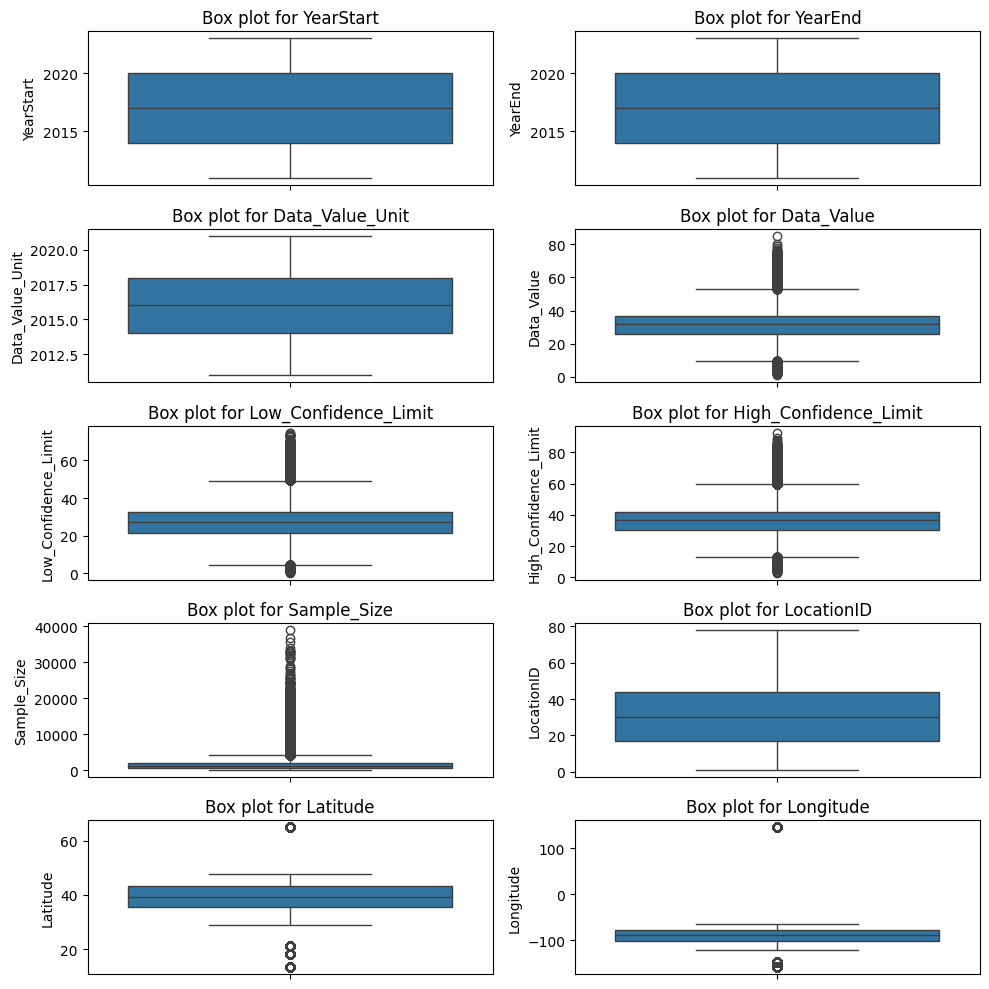

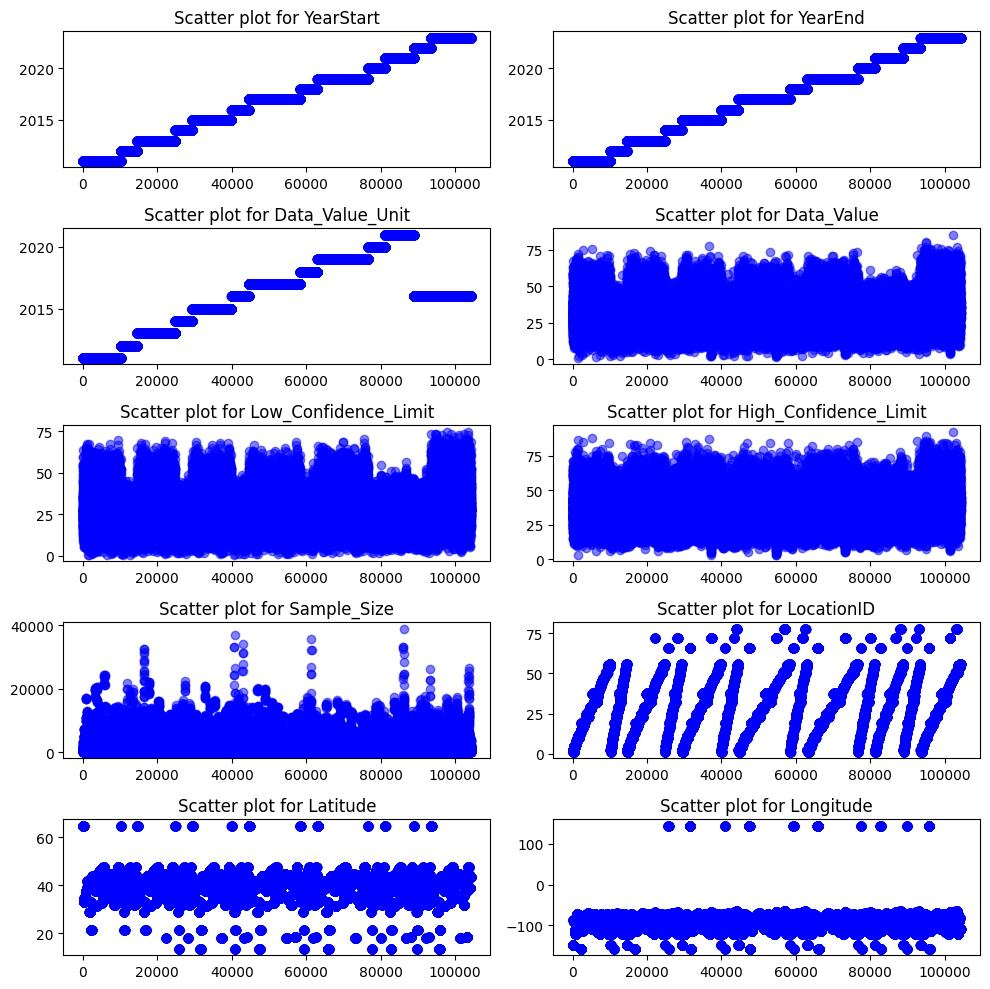

In [31]:
# Visuallizing  outliers of numerical attributes before handling 
import matplotlib.pyplot as plt
import seaborn as sns
def visualize_outliers():
    plt.figure(figsize=(10,10))
    for i, col in enumerate(num_columns, 1):
        plt.subplot(5,2,i)
        sns.boxplot(data[col])
        plt.title(f"Box plot for {col}")
        plt.tight_layout()


    plt.show

    plt.figure(figsize=(10,10))
    for i, col in enumerate(num_columns, 1):
        plt.subplot(5, 2, i)
        plt.scatter(data.index, data[col], color='blue', alpha=0.5)
        plt.title(f"Scatter plot for {col}")
        plt.tight_layout()
    plt.show
visualize_outliers()


In [32]:
pd.options.display.max_columns = None
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Latitude,Longitude,StratificationCategory,StratificationValue
0,2011.0,2011.0,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,23.3,16.1,32.4,128.0,Missing age group,Missing Education,Missing Income,2 or more races,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2.0,Race/Ethnicity,2 or more races,RACE,RACE2PLUS,64.84508,-147.722059,Race/Ethnicity,2 or more races
1,2011.0,2011.0,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,35.5,22.7,50.9,63.0,Missing age group,Missing Education,Missing Income,Other,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2.0,Race/Ethnicity,Other,RACE,RACEOTH,64.84508,-147.722059,Race/Ethnicity,Other
2,2011.0,2011.0,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,21.7,19.1,24.6,1702.0,Missing age group,Missing Education,Missing Income,Other,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2.0,Gender,Female,GEN,FEMALE,64.84508,-147.722059,Gender,Female
3,2011.0,2011.0,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,29.5,24.5,35.0,562.0,35 - 44,Missing Education,Missing Income,Other,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2.0,Age (years),35 - 44,AGEYR,AGEYR3544,64.84508,-147.722059,Age (years),35 - 44
4,2011.0,2011.0,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,33.5,26.2,41.7,377.0,Missing age group,Missing Education,"$15,000 - $24,999",Other,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2.0,Income,"$15,000 - $24,999",INC,INC1525,64.84508,-147.722059,Income,"$15,000 - $24,999"


In [33]:

print (data["Race/Ethnicity"].value_counts(),"\n")
print (data["Class"].value_counts(),"\n")
print (data["Data_Value"].value_counts(),"\n")



Race/Ethnicity
Other                            76755
2 or more races                   3655
Non-Hispanic White                3655
Asian                             3655
Hawaiian/Pacific Islander         3655
American Indian/Alaska Native     3655
Hispanic                          3655
Non-Hispanic Black                3655
Name: count, dtype: int64 

Class
Physical Activity          54684
Obesity / Weight Status    38640
Fruits and Vegetables       9016
Name: count, dtype: int64 

Data_Value
31.7    11129
33.9      441
34.9      438
34.7      437
34.3      436
        ...  
4.2         1
76.2        1
68.1        1
1.9         1
76.6        1
Name: count, Length: 723, dtype: int64 



In [34]:
data = data.drop(columns = ['Topic'])
data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Question', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'Age(years)', 'Education', 'Income', 'Race/Ethnicity', 'GeoLocation',
       'ClassID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'LocationID',
       'StratificationCategory1', 'Stratification1',
       'StratificationCategoryId1', 'StratificationID1', 'Latitude',
       'Longitude', 'StratificationCategory', 'StratificationValue'],
      dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_columns = data.select_dtypes(include=["object"]).columns.tolist()

categorical_columns = [col for col in categorical_columns if col != "Class"]
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

print(data.head())

   YearStart  YearEnd  LocationAbbr  LocationDesc  Datasource  \
0     2011.0   2011.0             0             1           0   
1     2011.0   2011.0             0             1           0   
2     2011.0   2011.0             0             1           0   
3     2011.0   2011.0             0             1           0   
4     2011.0   2011.0             0             1           0   

                     Class  Question  Data_Value_Unit  Data_Value_Type  \
0  Obesity / Weight Status         1           2011.0                0   
1  Obesity / Weight Status         1           2011.0                0   
2        Physical Activity         3           2011.0                0   
3  Obesity / Weight Status         1           2011.0                0   
4  Obesity / Weight Status         0           2011.0                0   

   Data_Value  Low_Confidence_Limit  High_Confidence_Limit  Sample_Size  \
0        23.3                  16.1                   32.4        128.0   
1        35.5 

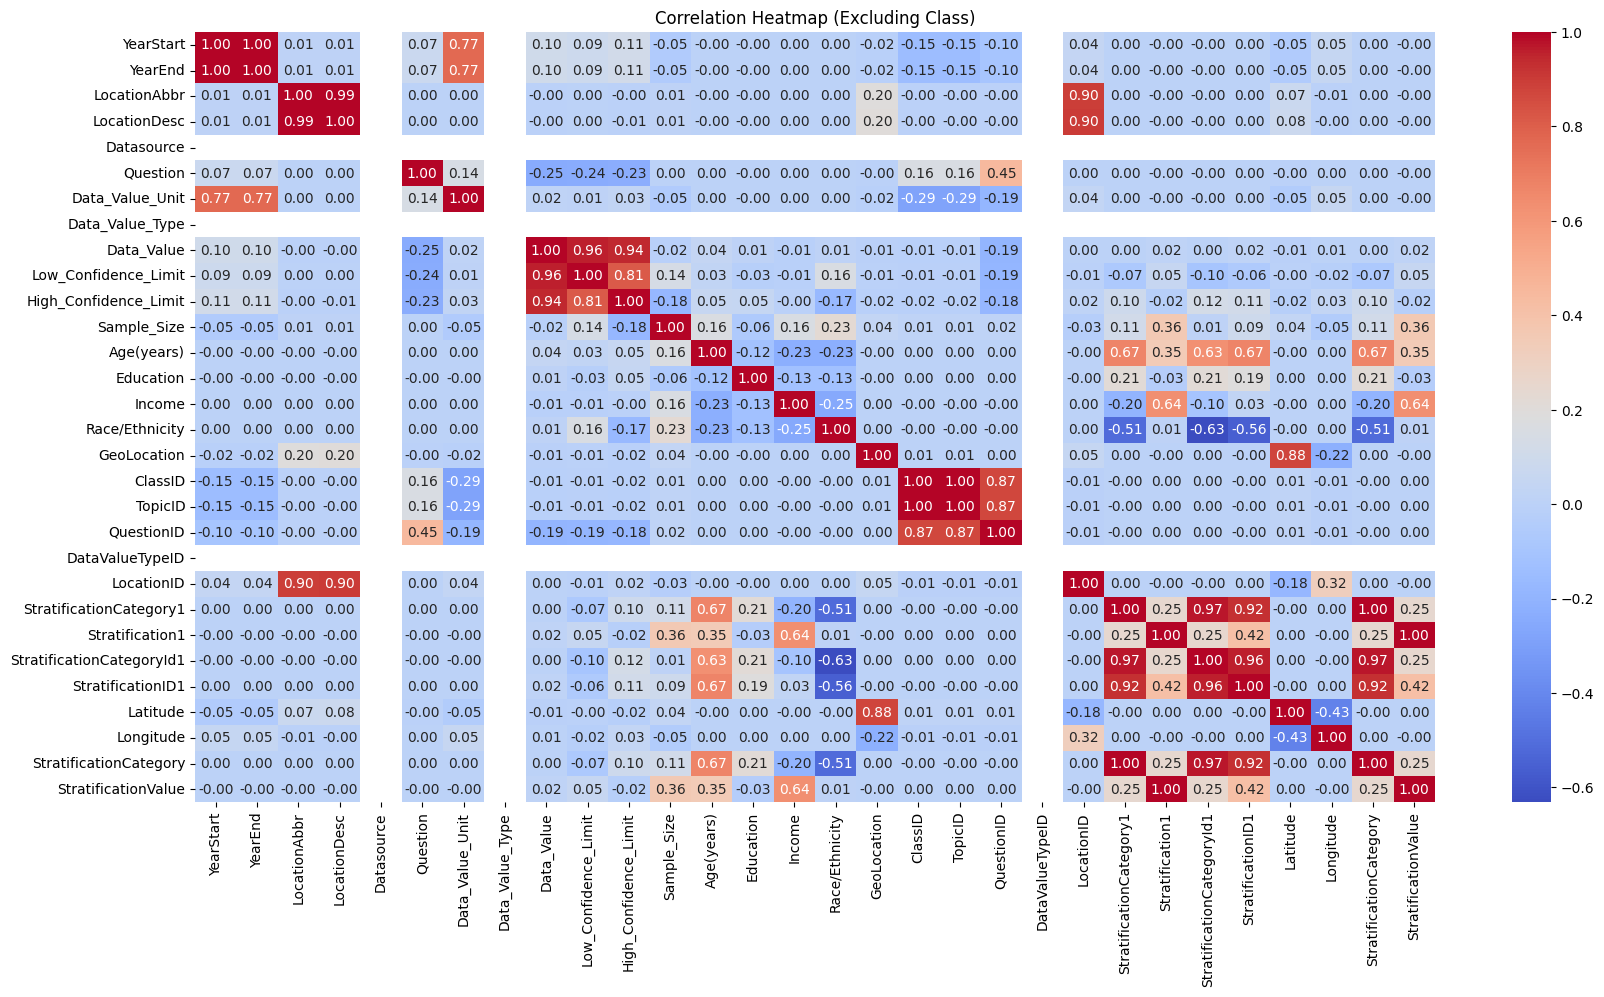

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_numeric = data.drop(columns=['Class'])
corr_matrix = data_numeric.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap (Excluding Class)')
plt.show()



ML Algorithnms 

In [37]:
import pandas as pd

physical_activity = data[data["Class"] == "Physical Activity"]
obesity_weight_status = data[data["Class"] == "Obesity / Weight Status"]
fruits_vegetables = data[data["Class"] == "Fruits and Vegetables"]

print("Physical Activity DataFrame:")
print(physical_activity.head())

print("Obesity / Weight Status DataFrame:")
print(obesity_weight_status.head())

print("Fruits and Vegetables DataFrame:")
print(fruits_vegetables.head())


Physical Activity DataFrame:
    YearStart  YearEnd  LocationAbbr  LocationDesc  Datasource  \
2      2011.0   2011.0             0             1           0   
6      2011.0   2011.0             0             1           0   
8      2011.0   2011.0             0             1           0   
9      2011.0   2011.0             0             1           0   
12     2011.0   2011.0             0             1           0   

                Class  Question  Data_Value_Unit  Data_Value_Type  Data_Value  \
2   Physical Activity         3           2011.0                0        21.7   
6   Physical Activity         5           2011.0                0        28.8   
8   Physical Activity         5           2011.0                0        35.9   
9   Physical Activity         4           2011.0                0        31.7   
12  Physical Activity         3           2011.0                0        31.7   

    Low_Confidence_Limit  High_Confidence_Limit  Sample_Size  Age(years)  \
2          

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

y = physical_activity['Data_Value']
X = physical_activity[["High_Confidence_Limit","Latitude","Longitude","StratificationCategory1"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")


Mean Squared Error: 6.84
R-squared: 0.95


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

y = obesity_weight_status['Data_Value']
X = obesity_weight_status[["High_Confidence_Limit","Latitude","Longitude","StratificationCategory1"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")


Mean Squared Error: 5.26
R-squared: 0.86


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

y = fruits_vegetables['Data_Value']
X = fruits_vegetables[["High_Confidence_Limit","Latitude","Longitude","StratificationCategory1"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")


Mean Squared Error: 6.33
R-squared: 0.95


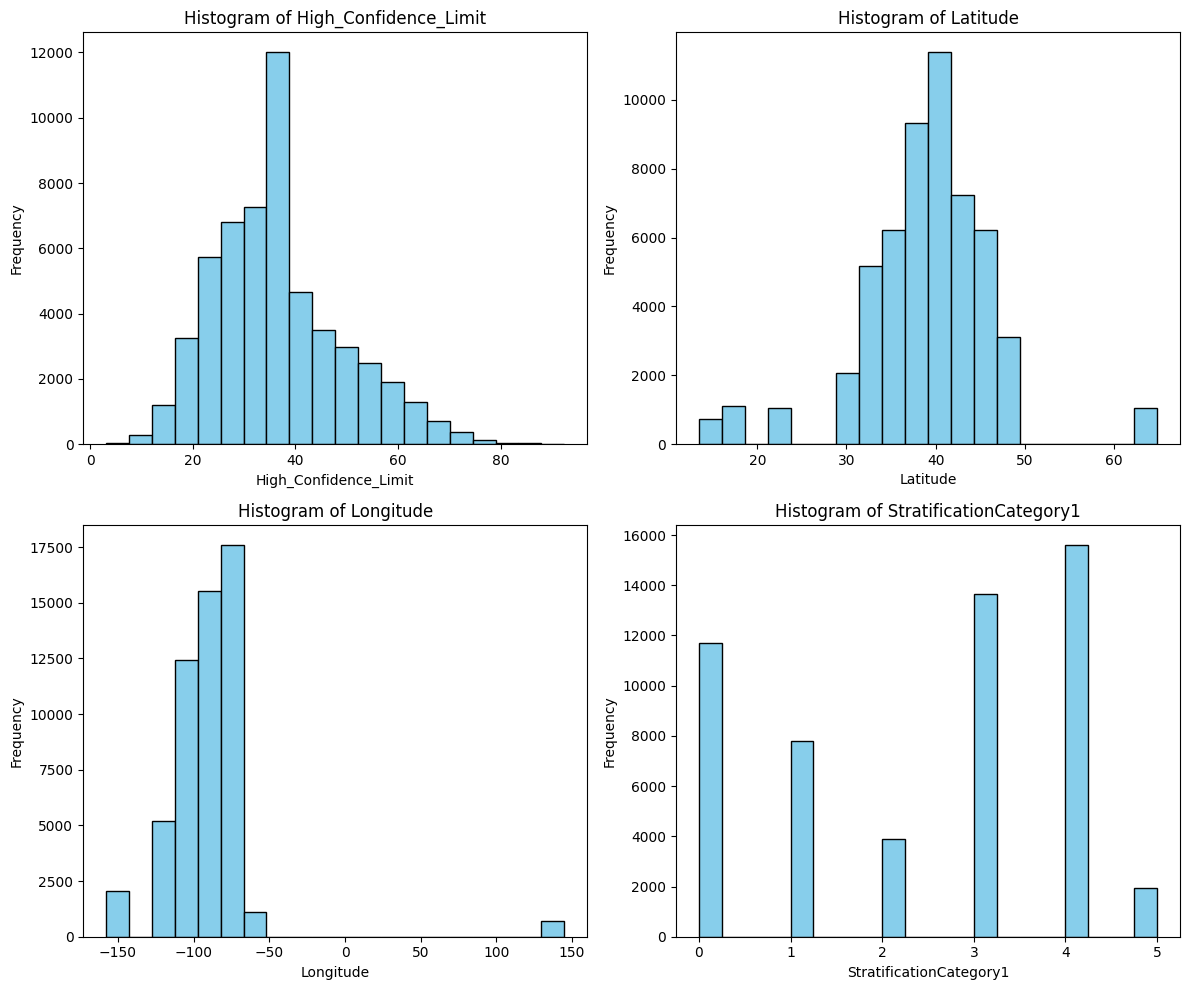

In [41]:
import matplotlib.pyplot as plt

attributes = ["High_Confidence_Limit", "Latitude", "Longitude", "StratificationCategory1"]
plt.figure(figsize=(12, 10))

for i, col in enumerate(attributes, 1):
    plt.subplot(2, 2, i)
    plt.hist(physical_activity[col], bins=20, color="skyblue", edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


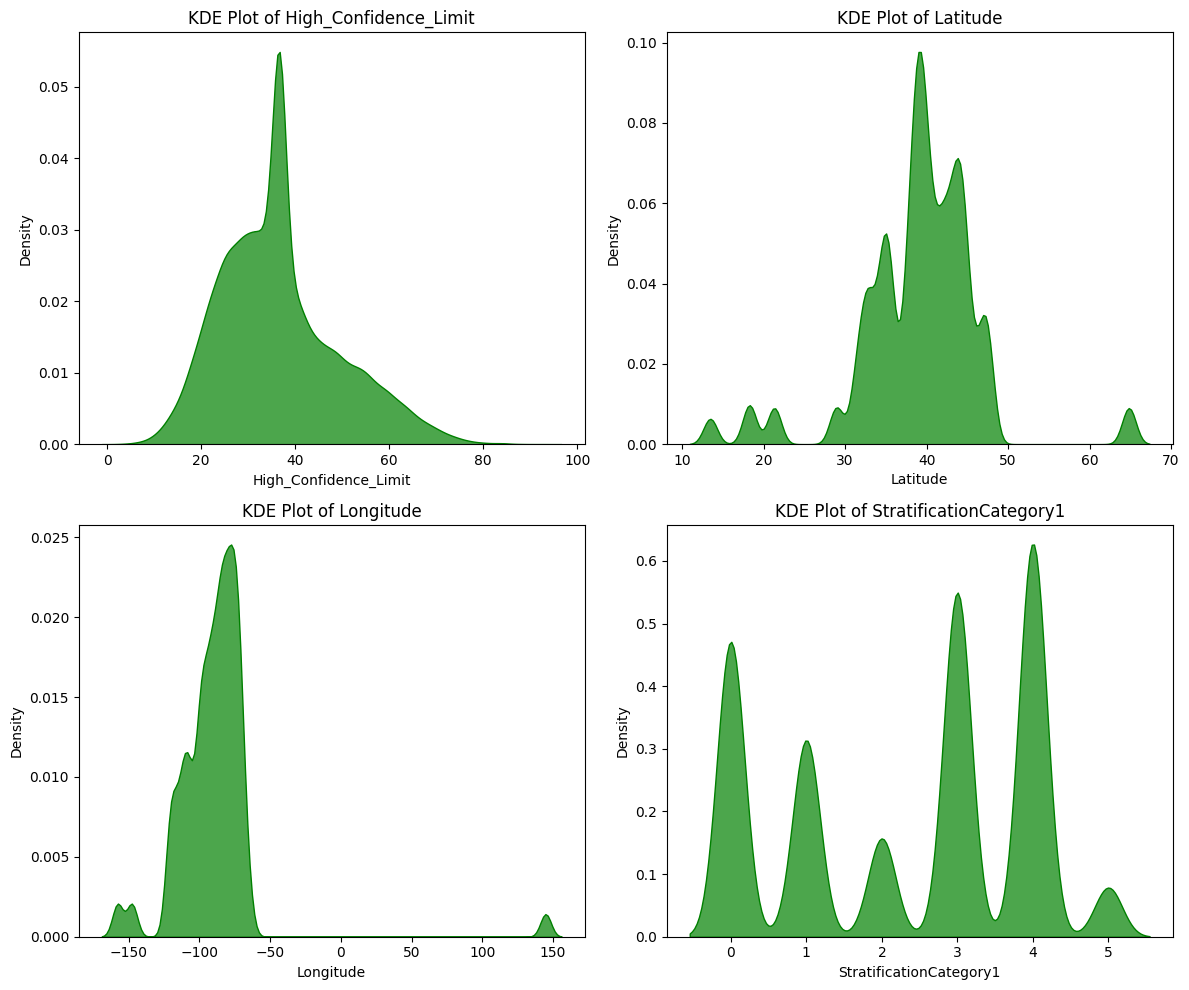

In [42]:
import seaborn as sns

plt.figure(figsize=(12, 10))

for i, col in enumerate(attributes, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(physical_activity[col], fill=True, color="green", alpha=0.7)
    plt.title(f"KDE Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()
